In [1]:
import os
import sys
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Crop = pd.read_csv('Desktop/NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv', encoding=('ISO-8859-1'))

In [154]:
Crop

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808
...,...,...,...,...,...
715,2017,AUGUST,COCOYAM,91,208.950
716,2017,SEPTEMBER,COCOYAM,91,193.720
717,2017,OCTOBER,COCOYAM,91,210.270
718,2017,NOVEMBER,COCOYAM,91,197.450


In [155]:
Crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


In [156]:
Crop.rename({'WEIGHT, KG PER BAG':'WEIGHT', ' PRICE, ¢ GH':'PRICE'}, axis=1, inplace=True)

In [157]:
Crop

,YEAR,MONTH,COMMODITY,WEIGHT,PRICE
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808
...,...,...,...,...,...
715,2017,AUGUST,COCOYAM,91,208.950
716,2017,SEPTEMBER,COCOYAM,91,193.720
717,2017,OCTOBER,COCOYAM,91,210.270
718,2017,NOVEMBER,COCOYAM,91,197.450


# UNIVARIATE ANALYSIS  

#### Year Analysis

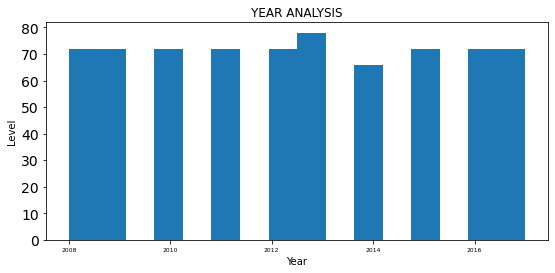

In [158]:
plt.figure(figsize=(9,4))
plt.hist(Crop['YEAR'], bins=16)
plt.title('YEAR ANALYSIS')
plt.xlabel('Year')
plt.ylabel('Level')
plt.xticks(fontsize=6)
plt.yticks(fontsize=14)
plt.show()

This shows that the year 2012 had the highest yield.

#### Month Analysis

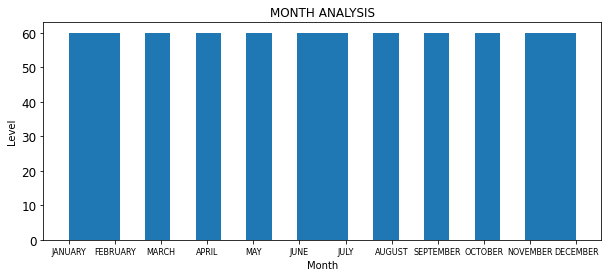

In [159]:
plt.figure(figsize=(10,4))
plt.hist(Crop['MONTH'], bins=20)
plt.title('MONTH ANALYSIS')
plt.xlabel('Month')
plt.ylabel('Level')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

#### Commodity Analysis

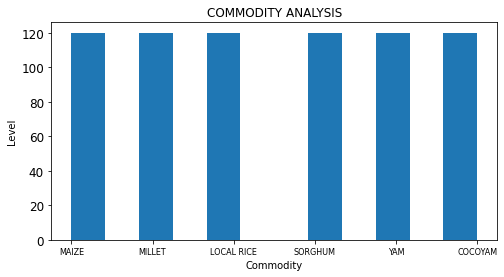

In [160]:
plt.figure(figsize=(8,4))
plt.hist(Crop['COMMODITY'], bins=12)
plt.title('COMMODITY ANALYSIS')
plt.xlabel('Commodity')
plt.ylabel('Level')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

#### Weight Analysis

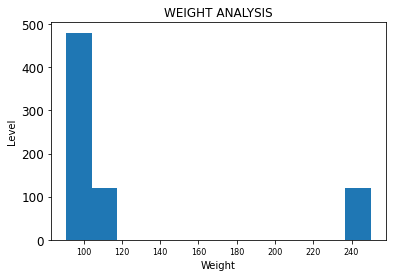

In [161]:
plt.figure(figsize=(6,4))
plt.hist(Crop['WEIGHT'], bins=12)
plt.title('WEIGHT ANALYSIS')
plt.xlabel('Weight')
plt.ylabel('Level')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

#### Price Analysis

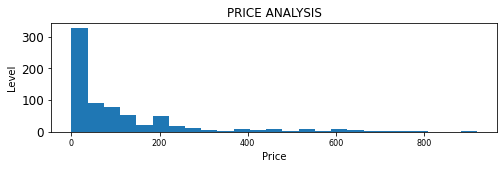

In [162]:
plt.figure(figsize=(8,2))
plt.hist(Crop['PRICE'], bins=25)
plt.title('PRICE ANALYSIS')
plt.xlabel('Price')
plt.ylabel('Level')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

# MULTIVARIATE ANALYSIS

#### Pie Chart

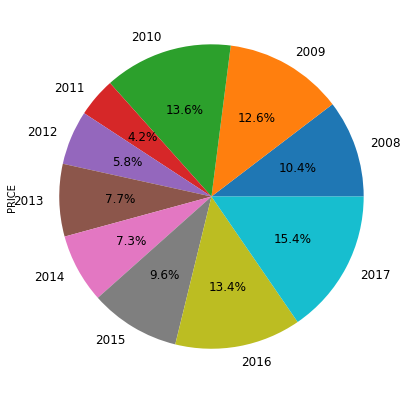

In [163]:
Crop.groupby('YEAR')['PRICE'].sum().plot(kind='pie', figsize=(7,7), fontsize=12, autopct='%1.1f%%')
plt.show()

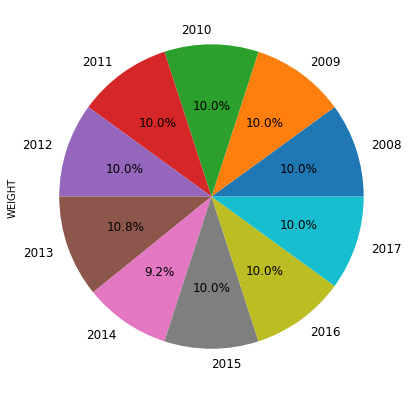

In [164]:
Crop.groupby('YEAR')['WEIGHT'].sum().plot(kind='pie', figsize=(7,7), fontsize=12, autopct='%1.1f%%')
plt.show()

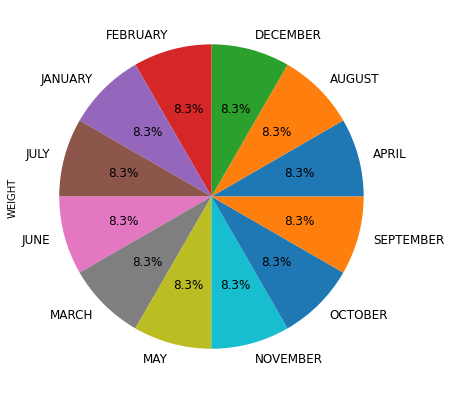

In [165]:
Crop.groupby('MONTH')['WEIGHT'].sum().plot(kind='pie', figsize=(7,7), fontsize=12, autopct='%1.1f%%')
plt.show()

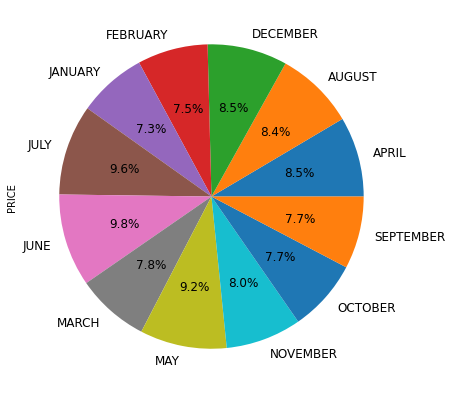

In [166]:
Crop.groupby('MONTH')['PRICE'].sum().plot(kind='pie', figsize=(7,7), fontsize=12, autopct='%1.1f%%')
plt.show()

### Table Chart

In [184]:
Crop.sort_values(by='PRICE', ascending=False).head()

,YEAR,MONTH,COMMODITY,WEIGHT,PRICE
377,2009,JUNE,SORGHUM,109,920.55
378,2009,JULY,SORGHUM,109,900.79
389,2010,JUNE,SORGHUM,109,884.20
390,2010,JULY,SORGHUM,109,884.15
388,2010,MAY,SORGHUM,109,807.45


In [185]:
Crop.sort_values(by='PRICE', ascending=False).tail()

,YEAR,MONTH,COMMODITY,WEIGHT,PRICE
421,2013,FEBRUARY,SORGHUM,109,0.008
422,2013,MARCH,SORGHUM,109,0.008
407,2011,DECEMBER,SORGHUM,109,0.007
406,2011,NOVEMBER,SORGHUM,109,0.007
405,2011,OCTOBER,SORGHUM,109,0.007


### Scatter Plot

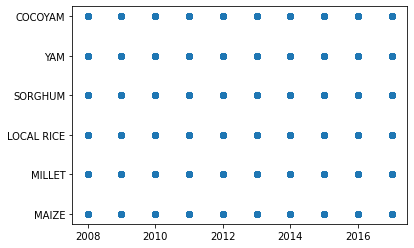

In [187]:
plt.scatter(Crop['YEAR'], Crop['COMMODITY'])
plt.show()

In [188]:
Crop.corr()

,YEAR,WEIGHT,PRICE
YEAR,1.000000e+00,1.103780e-13,0.053873
WEIGHT,1.103780e-13,1.000000e+00,0.404250
PRICE,5.387296e-02,4.042497e-01,1.000000
